In [40]:
# Set up
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Import files

#Raw Data
raw_file = r"C:\Users\krisf\OneDrive\Desktop\UROP SU25\Ceara sleep detection\Modified Data\raw\09192024\20240919.txt"
raw_data = pd.read_csv(raw_file, header=header, dtype = str, delimiter = '|', names = ['Time','MISC','Packet','Message','RSSI'])

#Ground Data
g_file = r"C:\Users\krisf\OneDrive\Desktop\UROP SU25\Ceara sleep detection\Modified Data\ground\ground_09192024.csv"
g_data = pd.read_csv(g_file, header = header, dtype = str, delimiter = ',', names = ['Hour', 'Minute', 'Second','HR', 'RR'])

#Pre-processed Data
p_data = pd.read_csv(p_file, header = header, dtype = str, delimiter = ',', names = ['Hour', 'msf','HR', 'RR'])
p_file = r"C:\Users\krisf\OneDrive\Desktop\UROP SU25\Ceara sleep detection\Modified Data\processed09192024\modified_09192024_hr_rr.csv"


header = 0

In [42]:
# Extract initial time from raw data

study_time_str = '09192024 09:36:57.026'
study_time = pd.to_datetime(study_time_str, format='%m%d%Y %H:%M:%S.%f')

study_time


Timestamp('2024-09-19 09:36:57.026000')

In [43]:
# Check data

g_data.head()

,Hour,Minute,Second,HR,RR
0,9,54,0,121,27
1,9,54,1,121,28
2,9,54,2,121,28
3,9,54,3,121,28
4,9,54,4,122,28


In [44]:
# p_data

In [45]:
# Plot ground data

g_df = pd.DataFrame(g_data, columns=['Hour', 'Minute', 'Second', "HR", "RR"])

g_df["HR"] = pd.to_numeric(g_df["HR"], errors="coerce")
g_df["RR"] = pd.to_numeric(g_df["RR"], errors="coerce")

times = g_df[['Hour','Minute','Second']].astype(str).agg(':'.join, axis=1)

g_df['Time'] = pd.to_datetime('09192024'+' '+times+'.000', format='%m%d%Y %H:%M:%S.%f')

g_df = g_df.drop(['Hour','Minute','Second'], axis=1)

g_df

print(g_df)
# g_df

      HR  RR                Time
0    121  27 2024-09-19 09:54:00
1    121  28 2024-09-19 09:54:01
2    121  28 2024-09-19 09:54:02
3    121  28 2024-09-19 09:54:03
4    122  28 2024-09-19 09:54:04
..   ...  ..                 ...
835  118  23 2024-09-19 10:07:55
836  118  23 2024-09-19 10:07:56
837  118  23 2024-09-19 10:07:57
838  118  23 2024-09-19 10:07:58
839  118  23 2024-09-19 10:07:59

[840 rows x 3 columns]


In [46]:
# Plot with x-axis being seconds since start of study (as in raw data)

delta = g_df['Time'] - study_time
g_df['Seconds'] = delta.dt.total_seconds()
g_df['Seconds'] = pd.to_numeric(g_df['Seconds'], errors="coerce")
g_df

,HR,RR,Time,Seconds
0,121,27,2024-09-19 09:54:00,1022.974
1,121,28,2024-09-19 09:54:01,1023.974
2,121,28,2024-09-19 09:54:02,1024.974
3,121,28,2024-09-19 09:54:03,1025.974
4,122,28,2024-09-19 09:54:04,1026.974
...,...,...,...,...
835,118,23,2024-09-19 10:07:55,1857.974
836,118,23,2024-09-19 10:07:56,1858.974
837,118,23,2024-09-19 10:07:57,1859.974
838,118,23,2024-09-19 10:07:58,1860.974


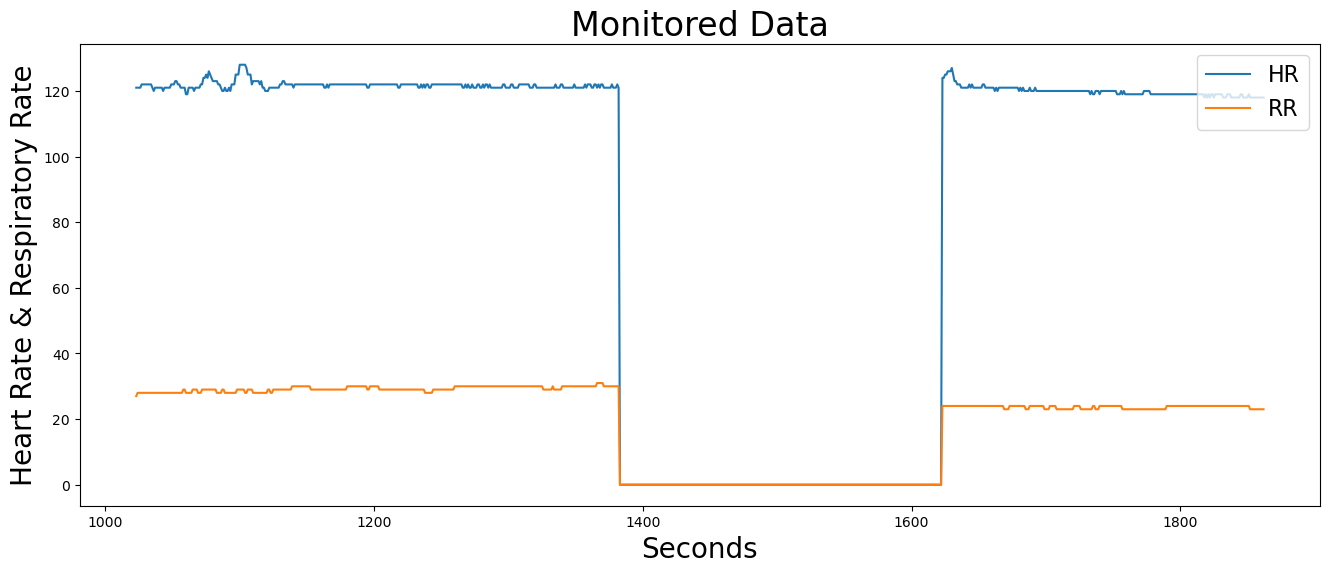

In [47]:
g_df.plot(x="Seconds", y=["HR", "RR"], figsize=(16, 6))
plt.xlabel('Seconds', fontsize="20")
plt.ylabel('Heart Rate & Respiratory Rate', fontsize="20")
plt.title("Monitored Data", fontsize="24")
plt.legend(fontsize="16", loc ="upper right")
plt.show()

In [48]:
downtime_start = g_df[(g_df == 0).any(axis=1)].iloc[0]['Seconds'] # in seconds
downtime_end = g_df[(g_df == 0).any(axis=1)].iloc[-1]['Seconds'] # in seconds

print(downtime_start)
print(downtime_end)

1382.974
1621.974


In [49]:
# Plot prediction

p_df = pd.DataFrame(p_data, columns=['Hour', 'msf', "HR", "RR"])

p_df["HR"] = pd.to_numeric(p_df["HR"], errors="coerce")
p_df["RR"] = pd.to_numeric(p_df["RR"], errors="coerce")

times = p_df[['Hour','msf']].astype(str).agg(':'.join, axis=1)

p_df
p_df['Time'] = pd.to_datetime('09192024'+' '+times, format='%m%d%Y %H:%M:%S.%f')
delta = p_df['Time'] - study_time
p_df['Seconds'] = delta.dt.total_seconds()
p_df['Seconds'] = pd.to_numeric(p_df['Seconds'], errors="coerce")

p_df = p_df.drop(['Hour', 'msf'], axis=1)


# p_df

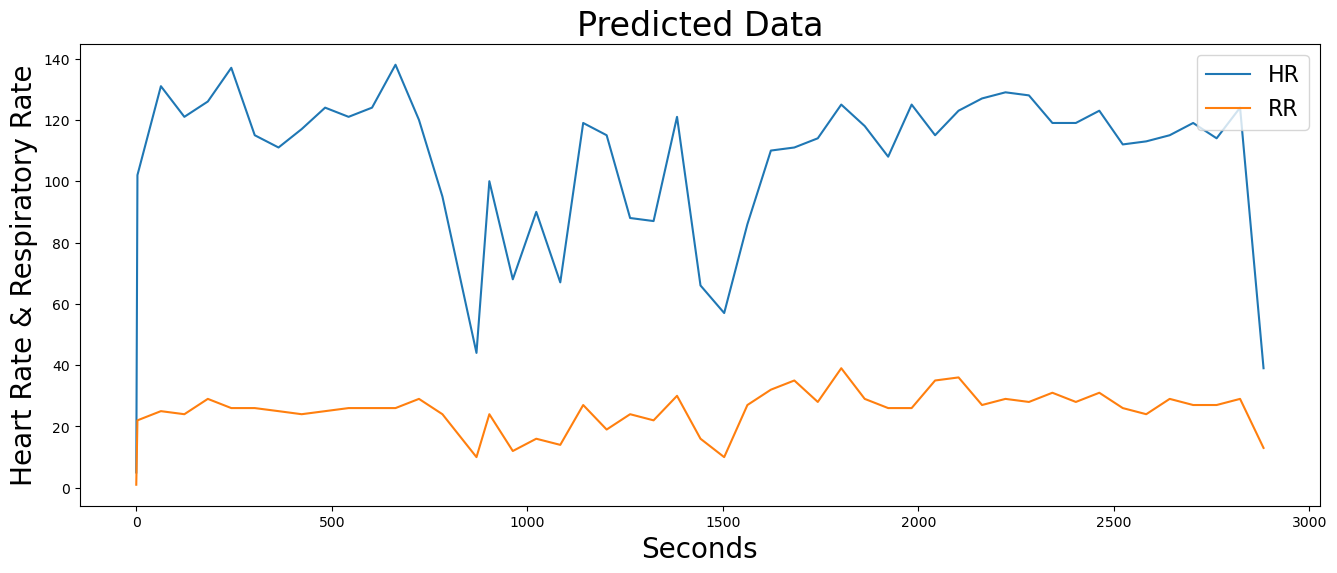

In [50]:
p_df.plot(x="Seconds", y=["HR", "RR"], figsize=(16, 6))
plt.xlabel('Seconds', fontsize="20")
plt.ylabel('Heart Rate & Respiratory Rate', fontsize="20")
plt.title("Predicted Data", fontsize="24")
plt.legend(fontsize="16", loc ="upper right")
plt.show()

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1.plot(g_df['Seconds'], g_df['HR'], label='Ground HR')
ax1.plot(p_df['Seconds'], p_df['HR'], label='Predicted HR')
ax1.set_xlabel('Seconds (s) from start')
ax1.set_ylabel('Heart Rate')
ax1.set_title('Overlapped HR from Two Files')
ax1.legend()


plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Visualize data
file = r"C:\Users\krisf\OneDrive\Desktop\UROP SU25\Ceara sleep detection\Modified Data\processed09192024\modified_processed09192024.csv"
data = pd.read_csv(
  file, header = header,
  parse_dates=['Time'],
  dtype={
    'XL_X': float, 'XL_Y': float, 'XL_Z': float,
    'G_X': float,  'G_Y': float,  'G_Z': float,
    'Temperature': float, 'Voltage': float, 'Packet': int
  },
    delimiter = ',',
)

df = pd.DataFrame(data, columns=["Time", 'XL_X', 'XL_Y', 'XL_Z',
    'G_X',  'G_Y',  'G_Z',
    'Temperature', 'Voltage', 'Packet'])
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S.%f')
# df

In [53]:
# Correct timestamps

def extrapolate_time(data, sampling_frequency):
    """
    Given a DataFrame `data` with a DateTime column 'Time', 
    return a DatetimeIndex of the same length as `data`,
    starting at the first timestamp and spaced by 1/sampling_frequency seconds.
    """
    # ensure Time is a datetime64 dtype
    data = data.copy()
    data['Time'] = pd.to_datetime(data['Time'])

    n = len(data)
    start = data['Time'].iloc[0]

    # pandas Timedelta for one sample interval
    interval = pd.to_timedelta(1 / sampling_frequency, unit='s')

    # build an evenly spaced index
    return pd.date_range(start=start, periods=n, freq=interval)


# usage
new_times = extrapolate_time(df, sampling_frequency=104)
df['Time'] = new_times
# new_times
# df

In [54]:
# Plot
delta = df['Time'] - study_time
df['Seconds'] = delta.dt.total_seconds()
df['Seconds'] = pd.to_numeric(df['Seconds'], errors="coerce")
df

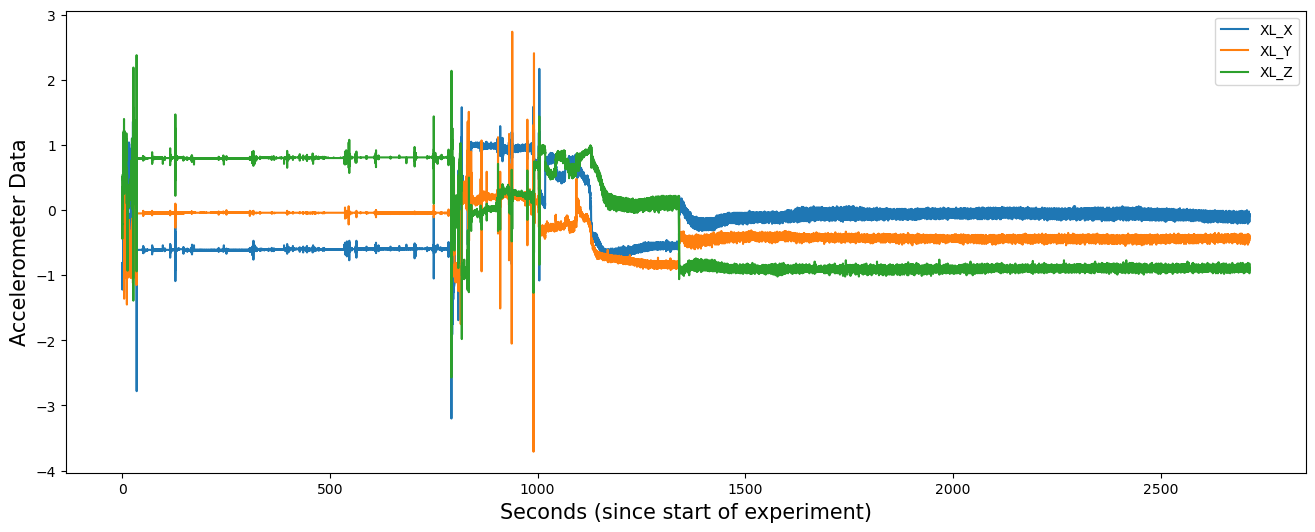

In [55]:

# 1) Grab ONLY the first 100 rows and work on that copy

#########################
# small = data.iloc[:100].copy()

# # 2) If you know all your sensor columns are already “clean” numeric strings:
# numeric_cols = small.columns.drop('Time')
# small[numeric_cols] = small[numeric_cols].astype(float)

# # 3) Ensure Time is a datetime dtype
# small['Time'] = pd.to_datetime(small['Time'], errors='coerce')

# # 4) Plot directly from this tiny DataFrame
# ax = small.plot(
#     x='Time',
#     y=['XL_X'],
#     figsize=(16, 6),
#     title="XL_X over Time (first 100 samples)"
# )
# ax.set_xlabel("Time")
# ax.set_ylabel("XL_X")
# plt.show()
#######################


df.plot(x='Seconds', y=["XL_X",  'XL_Y', 'XL_Z'], figsize=(16, 6))
plt.xlabel('Seconds (since start of experiment)', fontsize="15")
plt.ylabel('Accelerometer Data', fontsize="15")
# plt.title("Monitored Data", fontsize="24")
# plt.legend(fontsize="16", loc ="upper right")
plt.show()

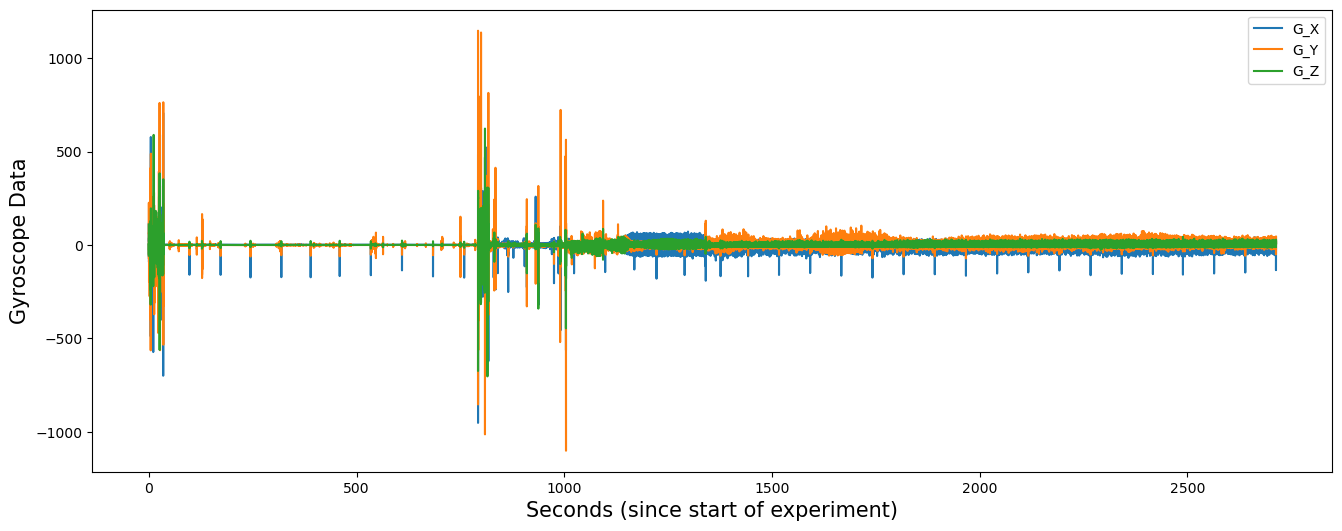

In [56]:
df.plot(x="Seconds", y=['G_X',  'G_Y',  'G_Z'], figsize=(16, 6))
plt.xlabel('Seconds (since start of experiment)', fontsize="15")
plt.ylabel('Gyroscope Data', fontsize="15")
# plt.title("Monitored Data", fontsize="24")
# plt.legend(fontsize="16", loc ="upper right")
plt.show()

Text(0, 0.5, 'Accelerometer Data (zoomed in)')

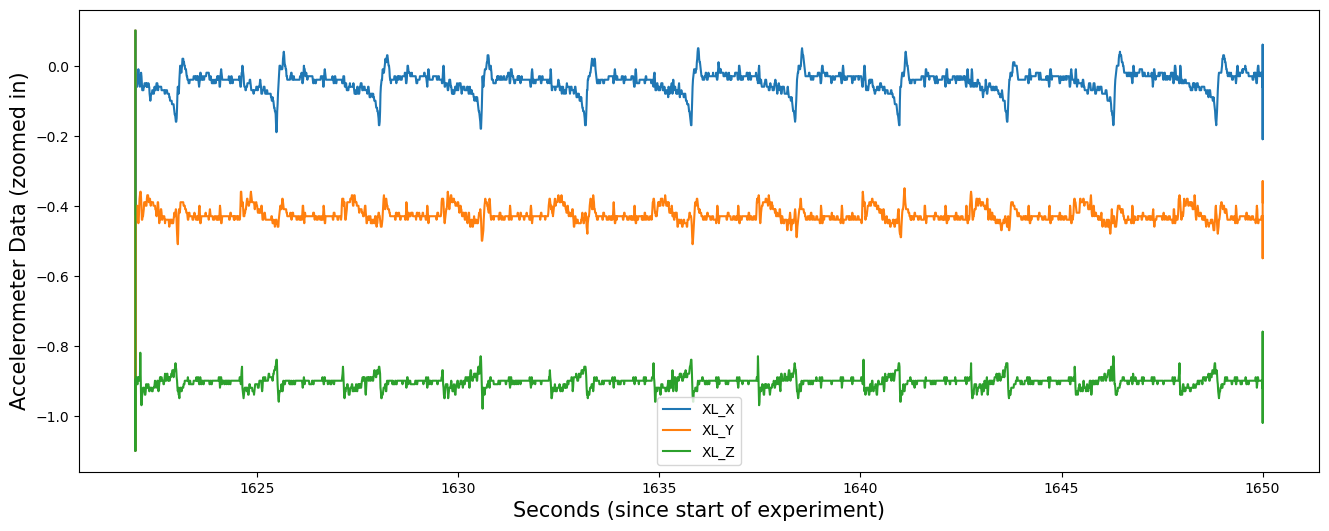

In [75]:
cropped_df = df[['Seconds', "XL_X",  'XL_Y', 'XL_Z']].copy()
cropped_df[["XL_X",  'XL_Y', 'XL_Z']] = cropped_df[["XL_X",  'XL_Y', 'XL_Z']].clip(lower=-1.1, upper=0.1)
cropped_df[['Seconds']] = cropped_df[['Seconds']].clip(lower=downtime_end, upper=1650)
cropped_df

cropped_df.plot(x='Seconds', y=["XL_X",  'XL_Y', 'XL_Z'], figsize=(16, 6))
plt.xlabel('Seconds (since start of experiment)', fontsize="15")
plt.ylabel('Accelerometer Data (zoomed in)', fontsize="15")

Text(0, 0.5, 'Gyroscope Data (zoomed in)')

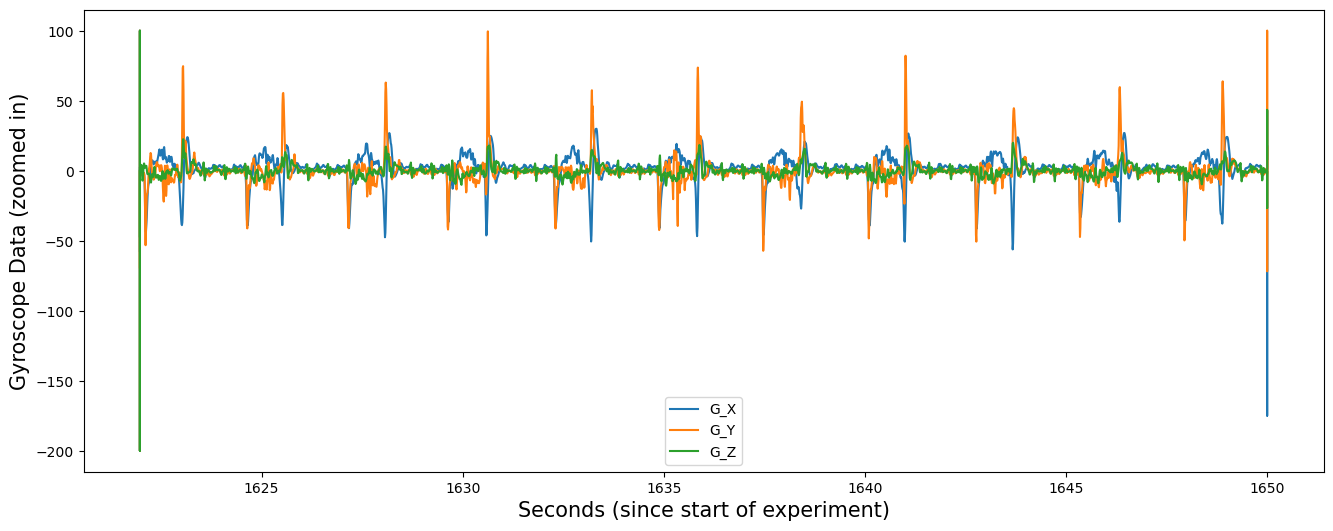

In [76]:
cropped_df = df[['Seconds', 'G_X', 'G_Y', 'G_Z']].copy()
cropped_df[['G_X', 'G_Y', 'G_Z']] = cropped_df[['G_X', 'G_Y', 'G_Z']].clip(lower=-200, upper=100)
cropped_df[['Seconds']] = cropped_df[['Seconds']].clip(lower=downtime_end, upper=1650)
cropped_df

cropped_df.plot(x='Seconds', y=['G_X', 'G_Y', 'G_Z'], figsize=(16, 6))
plt.xlabel('Seconds (since start of experiment)', fontsize="15")
plt.ylabel('Gyroscope Data (zoomed in)', fontsize="15")
# # plt.title("Monitored Data", fontsize="24")
# # plt.legend(fontsize="16", loc ="upper right")
# plt.show()
# # fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
# ax1.plot(df['Seconds'], cropped_df['G_X', 'G_Y', 'G_Z'], label='Ground HR')
# ax1.plot(df['Seconds'], p_df['HR'], label='Predicted HR')

In [74]:
# 

def convert_raw_data(file):
    """
    file (input, python list):  list of txt file names with the IMU data
    dat (output, pd DataFrame): table with columns Time, MISC, Packet, Message, RSSI
    hexdat (output, pd DataFrame): IMU binary data convered to hexadecimal 
    date (otuput, datetime): date in the format MMDDYYYY

    Time: In format HH:MM:SS.MS
    MISC: Type of data, f is for voltage, e for temperature and 6 for motility ??
    Packet: Gives the packet number
    Message: This is in bits
    RSSI: Received Signal Strength Indicator, measure that represents the relative quality level of a Bluetooth signal received on a device in decibels-milliwatts (dBm).
    """

    # arranging the data in a readable format as a pd variable
    header = 0
    dat = pd.read_csv(file, header = None, dtype = str, delimiter = '|', names = ['Time','MISC','Packet','Message','RSSI'])
    dat = dat[~dat.RSSI.str.contains('error')] # excludes any error messages when the device is out of range
    # dat = dat[dat.MISC.str.contains('f|e|6')] # To keep voltage, temperature and motility data only
    dat = dat.reset_index(drop=True)
    dat['timedelta'] = pd.to_timedelta(dat['Time'])
    # print(dat)

    # test
    # dat = dat[683333:1514188]
    # dat = dat[dat.MISC == ' 0e '] # local
    # print(dat)
    
    # decoding the message from bits to hex
    dat_col = dat.Message
    dat_col = dat_col.str.strip()
    hexdat = dat_col.str.split(' ') 
    # print(hexdat)

    return dat, hexdat
    # return dat, hexdat, fs


raw_file = r"C:\Users\krisf\OneDrive\Desktop\UROP SU25\Ceara sleep detection\Modified Data\raw\09192024\20240919.txt"

dat, hexdat =convert_raw_data(raw_file)

hexdat

0         [e1, aa, 07, 1a, 04, a7, f7, 48, f5, dd, f4, a...
1         [e0, fc, 05, 12, 08, 23, f9, 9c, f8, 4c, fa, c...
2         [e1, cf, 04, 33, 08, 45, fb, 58, fc, ce, ff, 0...
3         [e1, f7, 03, 02, 08, b7, fe, d9, 07, 6c, 00, e...
4         [e3, 13, 02, e6, 0b, 0b, 01, 2e, 0e, 85, fe, b...
                                ...                        
141126    [fc, bc, f1, 73, e3, bc, 00, 02, ff, ad, ff, f...
141127    [fb, 88, f1, 21, e4, f9, ff, 4d, ff, e7, 00, 4...
141128    [fa, af, f1, d3, e5, 89, fe, d2, 00, 2b, 00, b...
141129    [fd, 27, f1, 7e, e1, 0b, fe, ac, 03, 54, 03, 2...
141130    [fd, 78, f3, 62, e2, d4, 01, b9, 02, da, 01, 8...
Name: Message, Length: 141131, dtype: object